<a href="https://colab.research.google.com/github/arifsuz/Data-Mining-Clustering/blob/main/Konoha_Klustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MENDEFIINISAKAN DATA UNTUK DILAKUKAN PROSES PLOT DARI DATA MENTAH**

In [1]:
import pandas as pd

# Memuat data dari file 'BENCANA DKI JAKARTA.csv' sebagai data mentah
data = pd.read_csv('/content/drive/MyDrive/MATDIS/BENCANA DKI JAKARTA.csv')

# Menampilkan beberapa baris pertama dari data mentah untuk pemeriksaan data
data.head()

,provinsi,kota/kab,bencana,tahun,jumlah
0,DKI JAKARTA,Kepulauan Seribu,Puting Beliung,2012,1
1,DKI JAKARTA,Kepulauan Seribu,Puting Beliung,2016,1
2,DKI JAKARTA,Kepulauan Seribu,Puting Beliung,2018,2
3,DKI JAKARTA,Kepulauan Seribu,Kecelakaan Transportasi Sungai Laut,2007,1
4,DKI JAKARTA,Kepulauan Seribu,Kecelakaan Transportasi Sungai Laut,2014,1


In [2]:
from sklearn.preprocessing import LabelEncoder

# Mengencode kolom kategori
label_encoder = LabelEncoder()
data['kota/kab_encoded'] = label_encoder.fit_transform(data['kota/kab'])
data['bencana_encoded'] = label_encoder.fit_transform(data['bencana'])

# Memilih fitur yang akan digunakan untuk klasterisasi
features = data[['kota/kab_encoded', 'bencana_encoded', 'tahun', 'jumlah']]

features.head()

,kota/kab_encoded,bencana_encoded,tahun,jumlah
0,0,11,2012,1
1,0,11,2016,1
2,0,11,2018,2
3,0,5,2007,1
4,0,5,2014,1


<ipython-input-3-3708be6cb713>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Rect digunakan untuk menyesuaikan tight_layout dengan margin tertentu
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


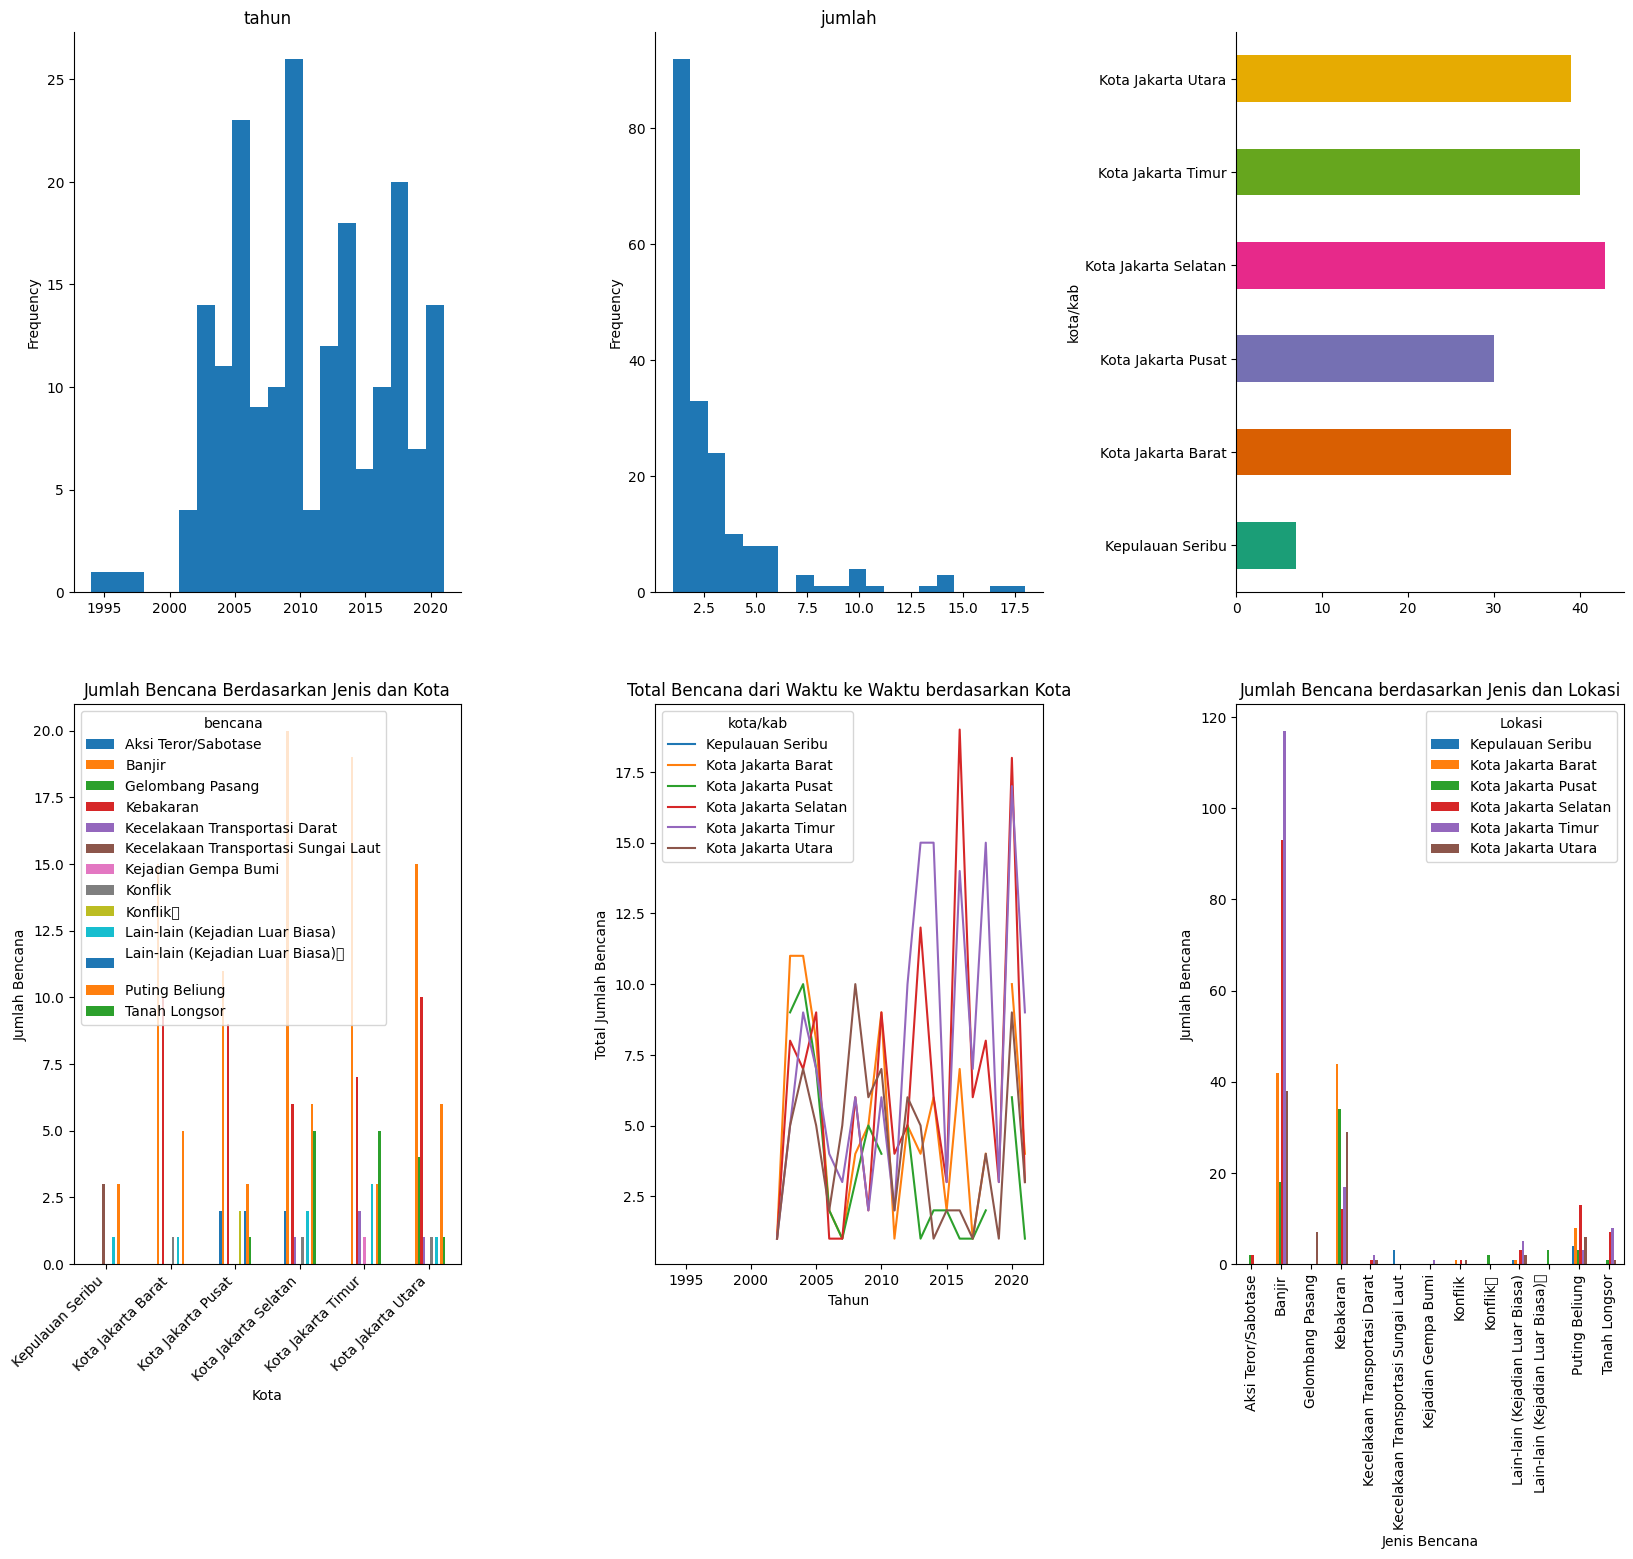

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Mengatur font default
plt.rcParams.update({'font.family': 'DejaVu Sans'})

# Mengatur ukuran figure
fig = plt.figure(figsize=(20, 16))  # Meningkatkan ukuran figure untuk menampung semua subplot
gs = GridSpec(2, 3, height_ratios=[1, 1], hspace=0.2, wspace=0.5)  # Menambahkan ruang horizontal dan vertikal di antara subplot

# Subplot 1: Histogram 'tahun'
ax1 = fig.add_subplot(gs[0, 0])
data['tahun'].plot(kind='hist', bins=20, ax=ax1, title='tahun')
ax1.spines[['top', 'right']].set_visible(False)

# Subplot 2: Histogram 'jumlah'
ax2 = fig.add_subplot(gs[0, 1])
data['jumlah'].plot(kind='hist', bins=20, ax=ax2, title='jumlah')
ax2.spines[['top', 'right']].set_visible(False)

# Subplot 3: Diagram batang 'kota/kab'
ax3 = fig.add_subplot(gs[0, 2])
data.groupby('kota/kab').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax3)
ax3.spines[['top', 'right']].set_visible(False)

# Subplot 4: Jumlah Bencana Berdasarkan Jenis dan Kota
ax4 = fig.add_subplot(gs[1, 0])
data_grouped = data.groupby(['kota/kab', 'bencana'])['jumlah'].count().unstack()
data_grouped.plot(kind='bar', ax=ax4)
ax4.set_xlabel('Kota')
ax4.set_ylabel('Jumlah Bencana')
ax4.set_title('Jumlah Bencana Berdasarkan Jenis dan Kota')
ax4.set_xticks(ax4.get_xticks())
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Subplot 5: Total Bencana dari Waktu ke Waktu berdasarkan Kota
ax5 = fig.add_subplot(gs[1, 1])
bencana_per_tahun = data.groupby(['tahun', 'kota/kab'])['jumlah'].sum().unstack()
bencana_per_tahun.plot(kind='line', ax=ax5)
ax5.set_xlabel('Tahun')
ax5.set_ylabel('Total Jumlah Bencana')
ax5.set_title('Total Bencana dari Waktu ke Waktu berdasarkan Kota')

# Subplot 6: Jumlah Bencana berdasarkan Jenis dan Lokasi
ax6 = fig.add_subplot(gs[1, 2])
jumlah_bencana = data.groupby(['bencana', 'kota/kab'])['jumlah'].sum().unstack()
jumlah_bencana.plot(kind='bar', ax=ax6)
ax6.set_xlabel('Jenis Bencana')
ax6.set_ylabel('Jumlah Bencana')
ax6.set_title('Jumlah Bencana berdasarkan Jenis dan Lokasi')
ax6.legend(title='Lokasi')

# Menampilkan plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Rect digunakan untuk menyesuaikan tight_layout dengan margin tertentu
plt.show()

<ipython-input-4-d6c8b64c070a>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='tahun', y='kota/kab', inner='stick', palette='Dark2', ax=ax7)
<ipython-input-4-d6c8b64c070a>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='jumlah', y='kota/kab', inner='stick', palette='Dark2', ax=ax8)
<ipython-input-4-d6c8b64c070a>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])


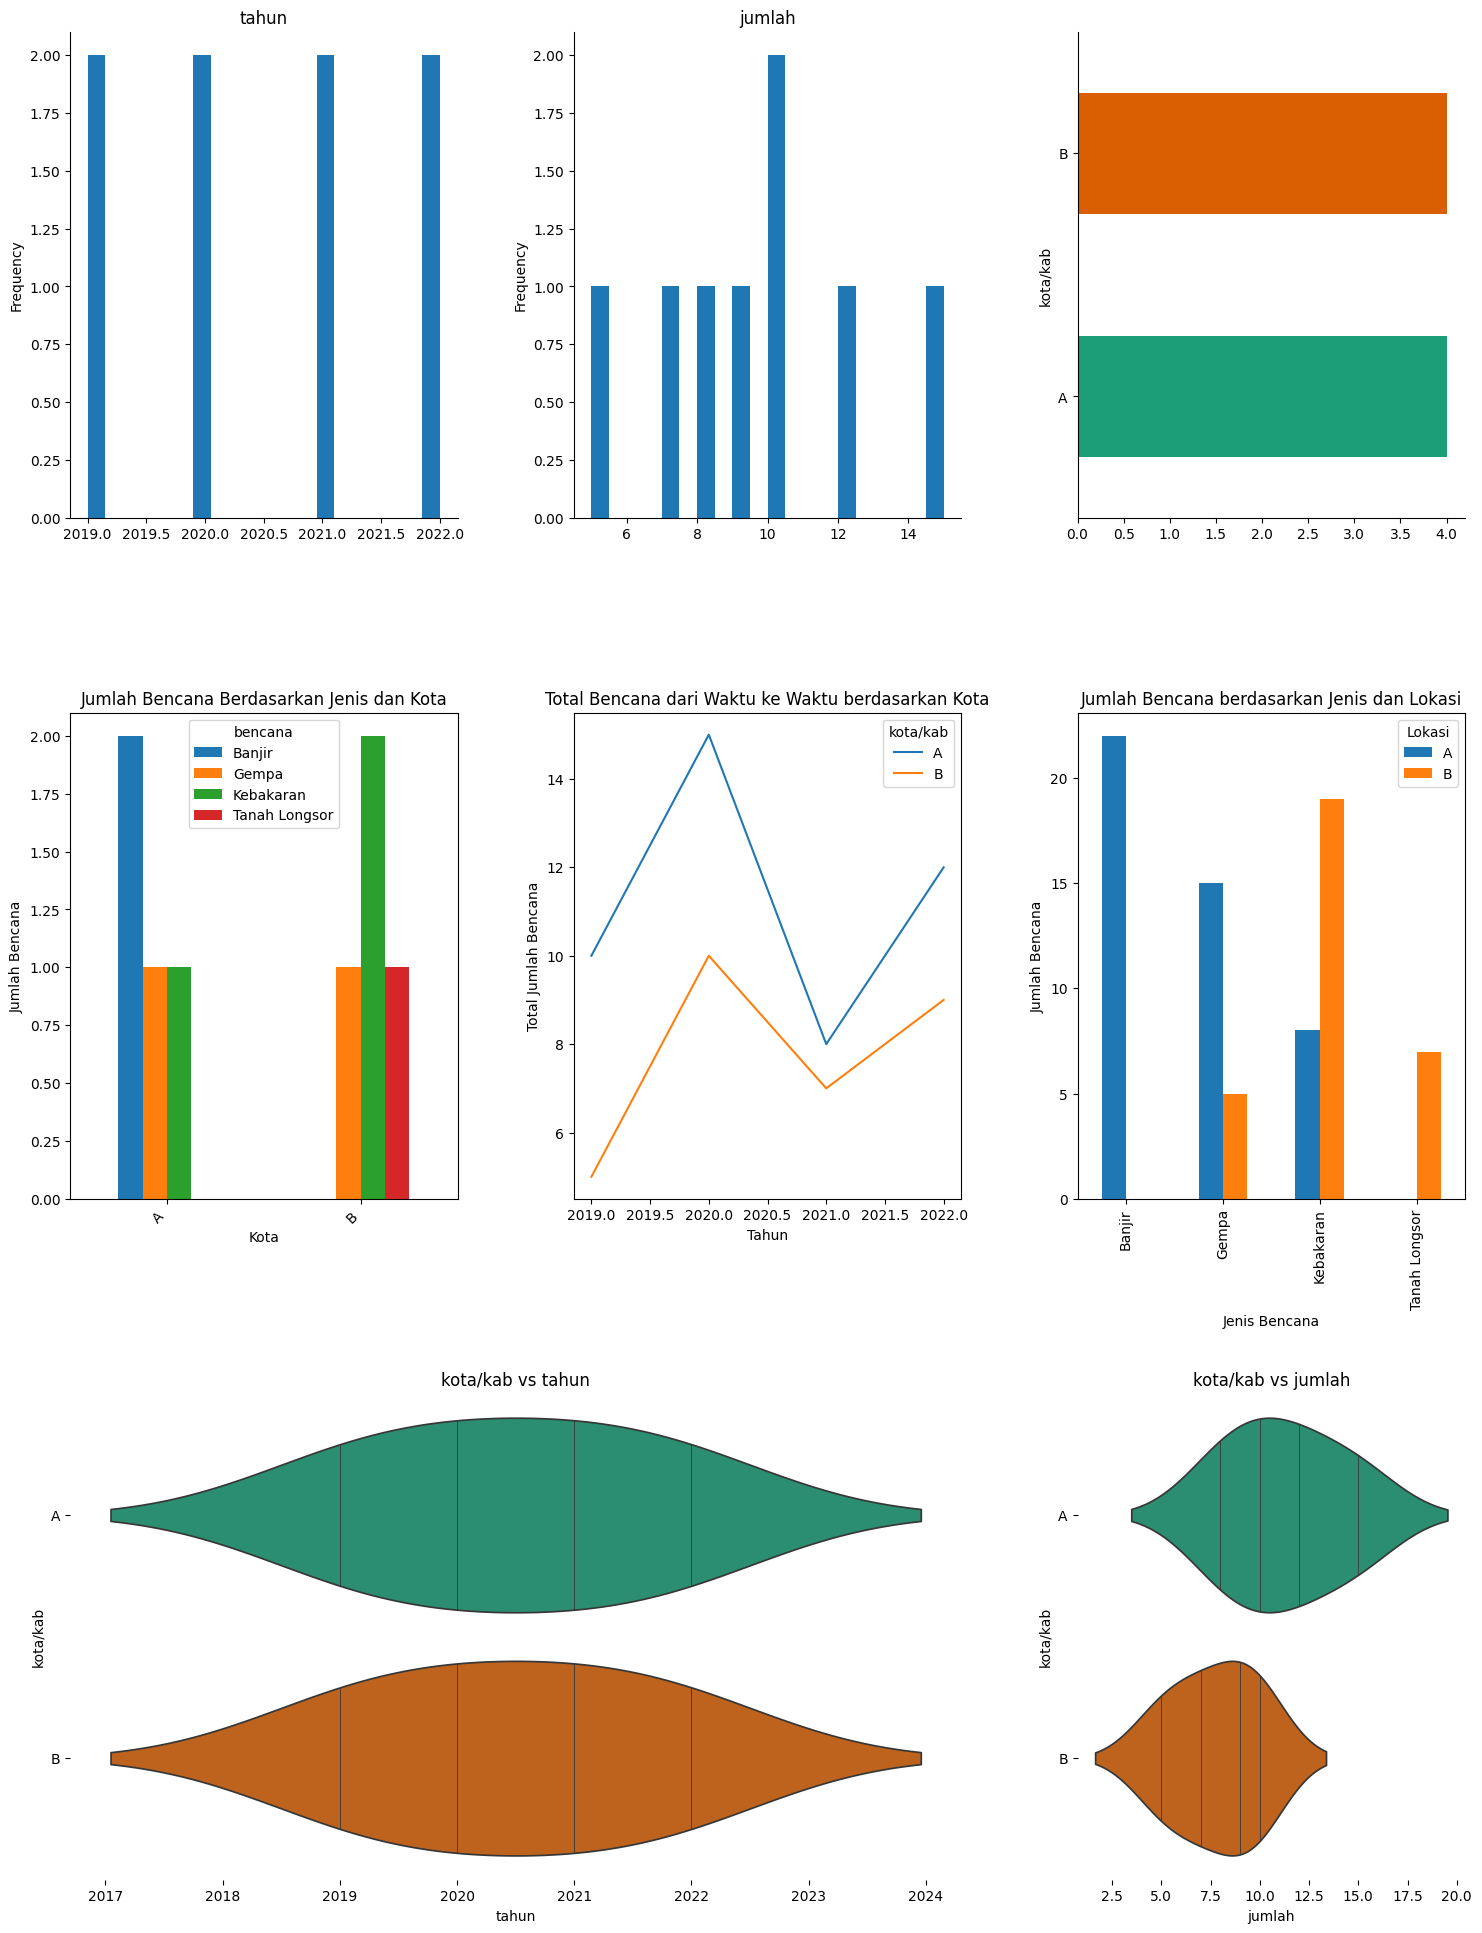

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import pandas as pd

# Data dummy untuk contoh
data = pd.DataFrame({
    'tahun': [2019, 2020, 2021, 2022, 2019, 2020, 2021, 2022],
    'jumlah': [10, 15, 8, 12, 5, 10, 7, 9],
    'kota/kab': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'bencana': ['Banjir', 'Gempa', 'Kebakaran', 'Banjir', 'Gempa', 'Kebakaran', 'Tanah Longsor', 'Kebakaran']
})

# Mengatur font default
plt.rcParams.update({'font.family': 'DejaVu Sans'})

# Mengatur ukuran figure
fig = plt.figure(figsize=(18, 24))  # Meningkatkan ukuran figure untuk menampung semua subplot
gs = GridSpec(3, 3, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)  # Menambahkan ruang horizontal dan vertikal di antara subplot

# Subplot 1: Histogram 'tahun'
ax1 = fig.add_subplot(gs[0, 0])
data['tahun'].plot(kind='hist', bins=20, ax=ax1, title='tahun')
ax1.spines[['top', 'right']].set_visible(False)

# Subplot 2: Histogram 'jumlah'
ax2 = fig.add_subplot(gs[0, 1])
data['jumlah'].plot(kind='hist', bins=20, ax=ax2, title='jumlah')
ax2.spines[['top', 'right']].set_visible(False)

# Subplot 3: Bar chart 'kota/kab'
ax3 = fig.add_subplot(gs[0, 2])
data.groupby('kota/kab').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=ax3)
ax3.spines[['top', 'right']].set_visible(False)

# Subplot 4: Jumlah Bencana Berdasarkan Jenis dan Kota
ax4 = fig.add_subplot(gs[1, 0])
data_grouped = data.groupby(['kota/kab', 'bencana'])['jumlah'].count().unstack()
data_grouped.plot(kind='bar', ax=ax4)
ax4.set_xlabel('Kota')
ax4.set_ylabel('Jumlah Bencana')
ax4.set_title('Jumlah Bencana Berdasarkan Jenis dan Kota')
ax4.set_xticks(ax4.get_xticks())
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Subplot 5: Total Bencana dari Waktu ke Waktu berdasarkan Kota
ax5 = fig.add_subplot(gs[1, 1])
bencana_per_tahun = data.groupby(['tahun', 'kota/kab'])['jumlah'].sum().unstack()
bencana_per_tahun.plot(kind='line', ax=ax5)
ax5.set_xlabel('Tahun')
ax5.set_ylabel('Total Jumlah Bencana')
ax5.set_title('Total Bencana dari Waktu ke Waktu berdasarkan Kota')

# Subplot 6: Jumlah Bencana berdasarkan Jenis dan Lokasi
ax6 = fig.add_subplot(gs[1, 2])
jumlah_bencana = data.groupby(['bencana', 'kota/kab'])['jumlah'].sum().unstack()
jumlah_bencana.plot(kind='bar', ax=ax6)
ax6.set_xlabel('Jenis Bencana')
ax6.set_ylabel('Jumlah Bencana')
ax6.set_title('Jumlah Bencana berdasarkan Jenis dan Lokasi')
ax6.legend(title='Lokasi')

# Subplot 7: Violin Plot kota/kab vs tahun
ax7 = fig.add_subplot(gs[2, :2])
sns.violinplot(data=data, x='tahun', y='kota/kab', inner='stick', palette='Dark2', ax=ax7)
ax7.set_title('kota/kab vs tahun')
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax7)

# Subplot 8: Violin Plot kota/kab vs jumlah
ax8 = fig.add_subplot(gs[2, 2])
sns.violinplot(data=data, x='jumlah', y='kota/kab', inner='stick', palette='Dark2', ax=ax8)
ax8.set_title('kota/kab vs jumlah')
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax8)

# Menampilkan plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



---



# **MENGELOLA DATA MENGGUNAKAN ALGORITNA K-MEANS UNTUK MEMISAHKAN DATA BERDASARKAN ANGKA TERJADINYA BENCANA**

---

# K-Means Clustering
K-means clustering mencoba mempartisi data ke dalam
𝑘
k cluster, di mana setiap data point termasuk ke cluster dengan centroid terdekat. Berikut adalah langkah-langkah dan alasan di balik penempatan kota/kab dalam cluster tertentu:

**Inisialisasi Centroid:**

K-means++ menginisialisasi centroid awal dengan cara yang lebih cerdas untuk meningkatkan konvergensi.
Random state digunakan untuk memastikan hasil yang dapat direproduksi.

**Pengelompokan Data:**

Data dipetakan ke centroid terdekat berdasarkan jarak Euclidean.
Setiap iterasi, centroid diperbarui berdasarkan mean dari titik-titik dalam cluster.

**Penentuan Cluster:**

Proses ini berulang sampai konvergensi, yaitu ketika centroid tidak lagi berubah signifikan.
Jumlah iterasi dan pemilihan centroid awal mempengaruhi hasil akhir.

               kota/kab  total_bencana  cluster
0      Kepulauan Seribu              8        2
1    Kota Jakarta Barat             96        3
2    Kota Jakarta Pusat             63        1
3  Kota Jakarta Selatan            132        0
4    Kota Jakarta Timur            153        0
5    Kota Jakarta Utara             85        3


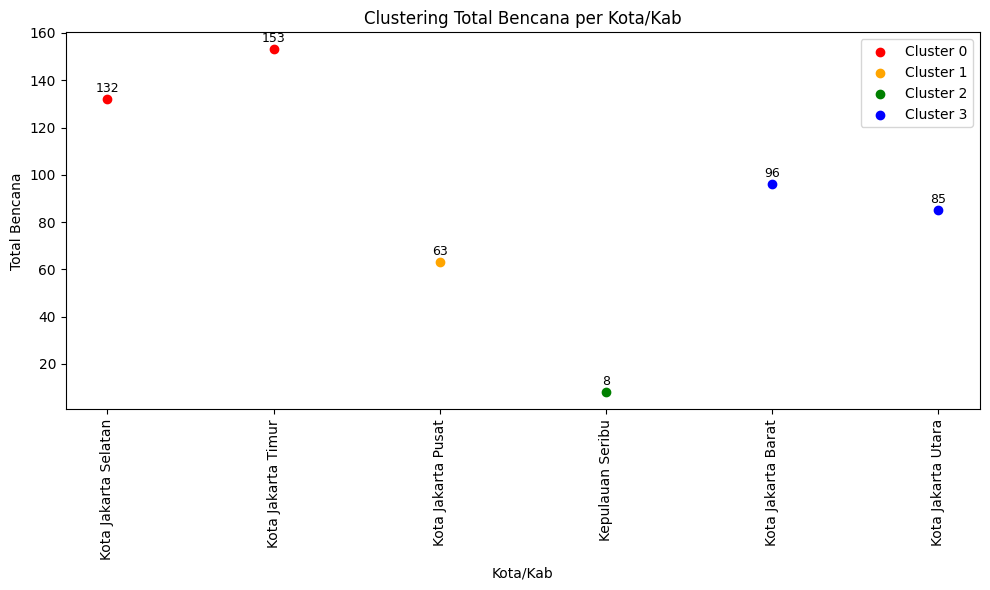

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MATDIS/BENCANA DKI JAKARTA.csv')

# Menghitung total jumlah bencana untuk setiap kota/kab
total_bencana_per_kota = data.groupby('kota/kab')['jumlah'].sum().reset_index()
total_bencana_per_kota.columns = ['kota/kab', 'total_bencana']

# Menentukan jumlah cluster
num_clusters = 4

# Menyiapkan data untuk clustering
X = total_bencana_per_kota[['total_bencana']]

# Menerapkan k-means clustering dengan inisialisasi k-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=50)
total_bencana_per_kota['cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
print(total_bencana_per_kota)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Menggunakan warna berbeda untuk setiap cluster
colors = ['red', 'orange', 'green', 'blue']
for cluster in range(num_clusters):
    clustered_data = total_bencana_per_kota[total_bencana_per_kota['cluster'] == cluster]
    plt.scatter(clustered_data['kota/kab'], clustered_data['total_bencana'],
                color=colors[cluster], label=f'Cluster {cluster}')

    # Menambahkan anotasi jumlah total bencana pada setiap kota/kab dengan jarak
    for i in range(len(clustered_data)):
        plt.text(clustered_data['kota/kab'].iloc[i], clustered_data['total_bencana'].iloc[i] + 3,
                 clustered_data['total_bencana'].iloc[i], fontsize=9, ha='center')

plt.xlabel('Kota/Kab')
plt.ylabel('Total Bencana')
plt.title('Clustering Total Bencana per Kota/Kab')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Setelah mencetak hasil clustering, kita dapat menganalisis mengapa setiap kota/kab masuk ke cluster tertentu berdasarkan total jumlah bencana. Sebagai contoh:


*   **Cluster 0** (misal, kota dengan total bencana tertinggi): Kota dengan jumlah bencana yang sangat tinggi dibandingkan dengan kota lainnya.
*   **Cluster 1** (misal, kota dengan jumlah bencana tinggi): Kota dengan jumlah bencana cukup tinggi tetapi tidak setinggi cluster 0.
*   **Cluster 2** (misal, kota dengan jumlah bencana sedang): Kota dengan jumlah bencana yang sedang.
*   **Cluster 3** (misal, kota dengan jumlah bencana terendah): Kota dengan jumlah bencana yang rendah.


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Memuat file CSV
file_path = '/content/drive/MyDrive/MATDIS/DATA KLUSTER.csv'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom non-numerik untuk pengelompokan
data_numerik = data.drop(columns=['Nama Kota/Kep', 'Kode Kota/Kep'])

# Normalisasi data
scaler = StandardScaler()
data_ternormalisasi = scaler.fit_transform(data_numerik)

# Terapkan pengelompokan K-means
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(data_ternormalisasi)

# Tambahkan informasi kelompok kembali ke data asli
data['Cluster'] = cluster

# Simpan data yang telah dikelompokkan ke file CSV baru
output_file_path = 'DATA KLUSTER K-MEANS.csv'
data.to_csv(output_file_path, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


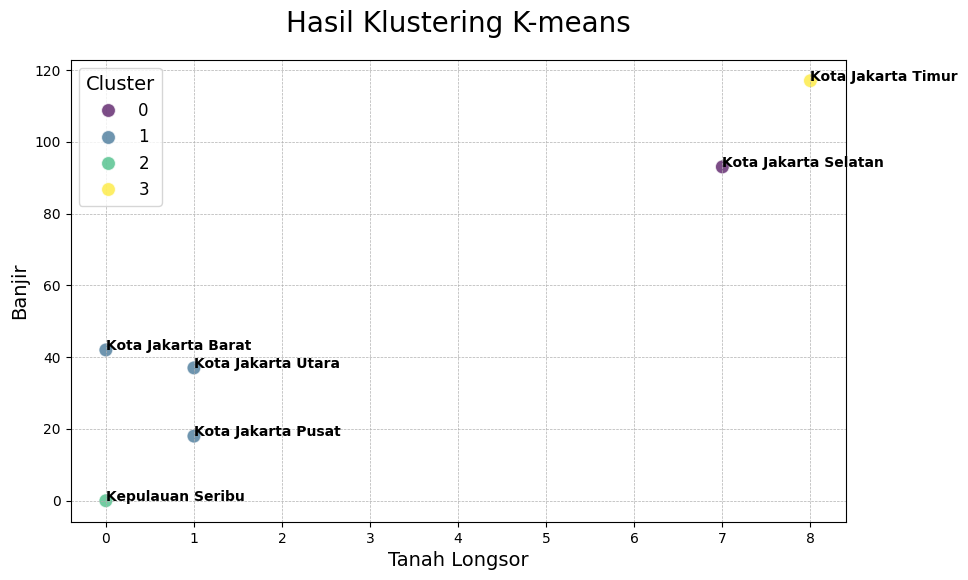

In [6]:
# Impor library yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat file CSV (diasumsikan bernama 'DATA KLUSTER K-MEANS.csv')
nama_file = 'DATA KLUSTER K-MEANS.csv'
data = pd.read_csv(nama_file, delimiter=',')

# Menghapus kolom non-numerik untuk pengelompokan
data_numerik = data.drop(columns=['Nama Kota/Kep', 'Kode Kota/Kep'])

# Normalisasi data
scaler = StandardScaler()
data_ternormalisasi = scaler.fit_transform(data_numerik)

# Terapkan pengelompokan K-means
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(data_ternormalisasi)

# Tambahkan informasi kelompok kembali ke data asli
data['Cluster'] = cluster

# Plot klaster dengan visualisasi yang ditingkatkan
plt.figure(figsize=(10, 6))
palet = sns.color_palette("viridis", as_cmap=True)
scatter = sns.scatterplot(
    x=data_numerik.columns[0],
    y=data_numerik.columns[1],
    hue='Cluster',
    palette=palet,
    data=data,
    legend='full',
    s=100,
    edgecolor='w',
    alpha=0.7
)

# Tingkatkan plot dengan fitur tambahan
plt.title('Hasil Klustering K-means', fontsize=20, loc='center', pad=20)
plt.xlabel(data_numerik.columns[0], fontsize=14)
plt.ylabel(data_numerik.columns[1], fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)

# Anotasi setiap titik dengan nama kota/kepulauan
for line in range(0, data.shape[0]):
    scatter.text(
        data[data_numerik.columns[0]].iloc[line],
        data[data_numerik.columns[1]].iloc[line],
        data['Nama Kota/Kep'].iloc[line],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.show()

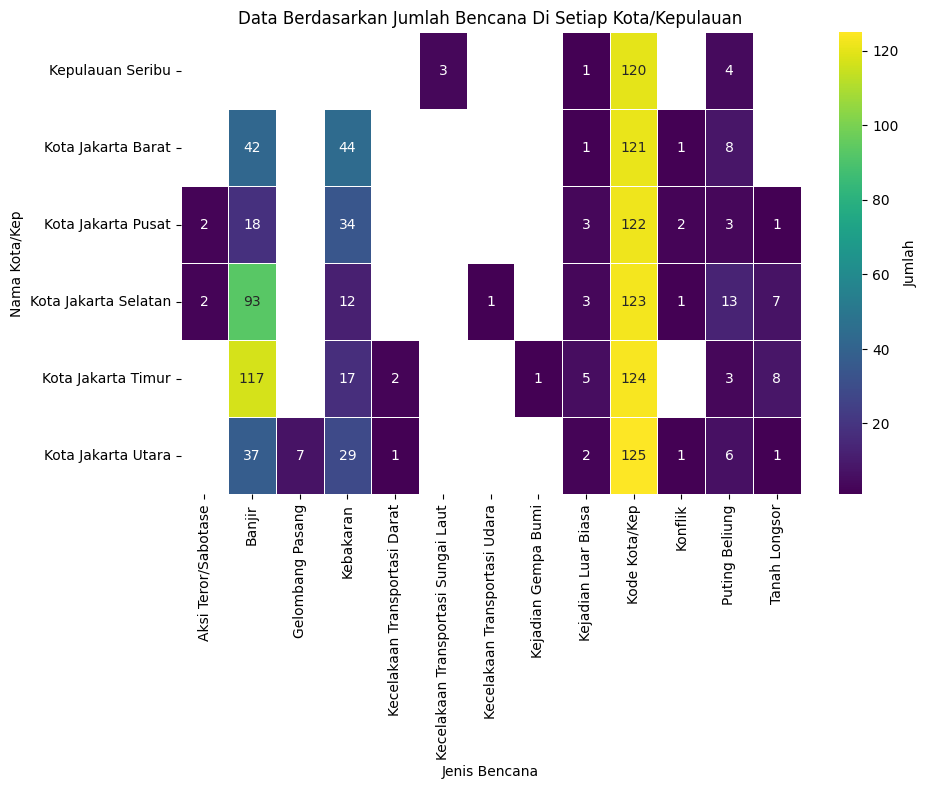

In [12]:
# Membuat DataFrame baru untuk heatmap
data_heatmap = data.melt(id_vars=['Nama Kota/Kep', 'Cluster'],  # Sesuaikan nama kolom di sini juga
                         var_name='Jenis Bencana',
                         value_name='Jumlah')

# Pivot tabel untuk heatmap
pivot_heatmap = data_heatmap.pivot_table(index='Nama Kota/Kep', columns='Jenis Bencana', values='Jumlah', aggfunc='sum', fill_value=0)

# Mengganti 0 dengan NaN
pivot_heatmap.replace(0, np.nan, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt='g', cmap='viridis', linewidths=.5, cbar_kws={'label': 'Jumlah'})

plt.title('Data Berdasarkan Jumlah Bencana Di Setiap Kota/Kepulauan')
plt.xlabel('Jenis Bencana')
plt.ylabel('Nama Kota/Kep')
plt.show()

# **MENGELOLA DATA MENGGUNAKAN ALGORITNA DBSCAB UNTUK MEMISAHKAN DATA BERDASARKAN ANGKA TERJADINYA BENCANA**

---


# DBSCAN
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** untuk mengelompokkan data bencana dari CSV tersebut. DBSCAN adalah algoritma clustering yang mengelompokkan data berdasarkan densitasnya, dan sangat efektif dalam mengidentifikasi outlier atau data yang tidak termasuk dalam cluster mana pun.

**Berikut langkah-langkah untuk menggunakan DBSCAN:**
1.   Menghitung total jumlah bencana untuk setiap kota/kab.
2.   Menyiapkan data untuk clustering.
3.   Menerapkan DBSCAN.
4.   Memvisualisasikan hasil clustering.

               kota/kab  total_bencana  cluster
0      Kepulauan Seribu              8       -1
1    Kota Jakarta Barat             96       -1
2    Kota Jakarta Pusat             63       -1
3  Kota Jakarta Selatan            132       -1
4    Kota Jakarta Timur            153       -1
5    Kota Jakarta Utara             85       -1


<ipython-input-13-2609209099a2>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


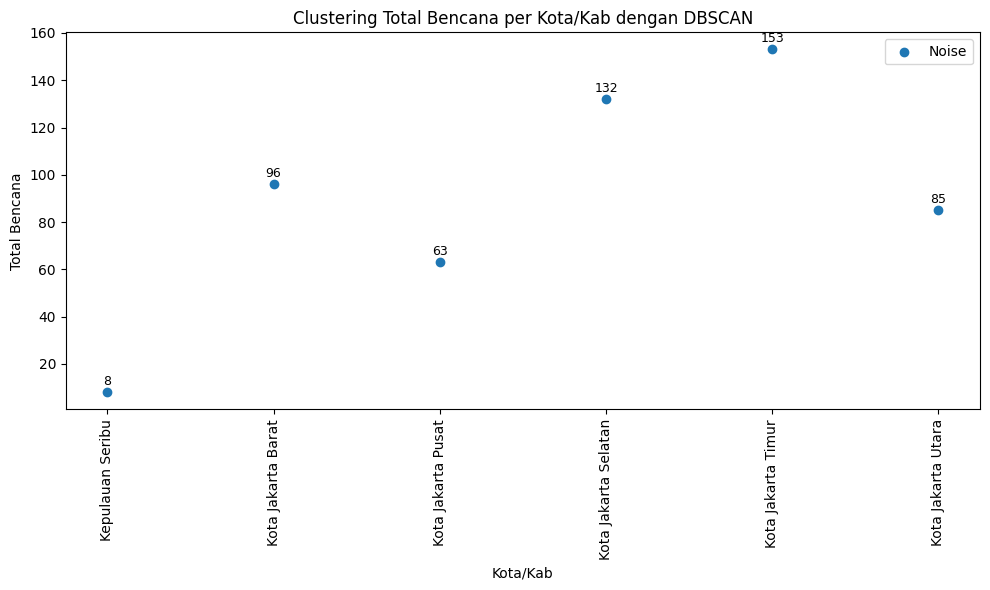

In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MATDIS/BENCANA DKI JAKARTA.csv')

# Menghitung total jumlah bencana untuk setiap kota/kab
total_bencana_per_kota = data.groupby('kota/kab')['jumlah'].sum().reset_index()
total_bencana_per_kota.columns = ['kota/kab', 'total_bencana']

# Menyiapkan data untuk clustering
X = total_bencana_per_kota[['total_bencana']]

# Menentukan parameter DBSCAN
eps = 5  # jarak maksimum antara dua sampel untuk satu dapat dianggap berada dalam lingkungan yang lain
min_samples = 2  # jumlah sampel (atau total berat) dalam sebuah lingkungan untuk dianggap sebagai titik inti

# Menerapkan DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
total_bencana_per_kota['cluster'] = dbscan.fit_predict(X)

# Menampilkan hasil clustering
print(total_bencana_per_kota)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Menggunakan warna berbeda untuk setiap cluster
unique_clusters = total_bencana_per_kota['cluster'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    clustered_data = total_bencana_per_kota[total_bencana_per_kota['cluster'] == cluster]
    plt.scatter(clustered_data['kota/kab'], clustered_data['total_bencana'],
                color=colors(cluster), label=f'Cluster {cluster}' if cluster != -1 else 'Noise')

    # Menambahkan anotasi jumlah total bencana pada setiap kota/kab dengan jarak
    for i in range(len(clustered_data)):
        plt.text(clustered_data['kota/kab'].iloc[i], clustered_data['total_bencana'].iloc[i] + 3,
                 clustered_data['total_bencana'].iloc[i], fontsize=9, ha='center')

plt.xlabel('Kota/Kab')
plt.ylabel('Total Bencana')
plt.title('Clustering Total Bencana per Kota/Kab dengan DBSCAN')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**Parameter DBSCAN**
*   `eps`: Jarak maksimum antara dua sampel untuk dianggap berada dalam lingkungan yang sama. Nilai ini perlu disesuaikan berdasarkan data Anda.
*   `min_samples`: Jumlah minimum sampel dalam lingkungan untuk dianggap sebagai titik inti. Ini juga perlu disesuaikan.

**DBSCAN** akan mengelompokkan data berdasarkan kepadatan dan menandai titik-titik yang tidak termasuk dalam cluster mana pun sebagai "Noise" (cluster -1). Anda dapat menyesuaikan parameter `eps` dan `min_samples` sesuai kebutuhan untuk mendapatkan hasil clustering yang sesuai.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Memuat file CSV
file_path = '/content/drive/MyDrive/MATDIS/DATA KLUSTER.csv'
data = pd.read_csv(file_path, delimiter=';')

# Menghapus kolom non-numerik untuk pengelompokan
data_numerik = data.drop(columns=['Nama Kota/Kep', 'Kode Kota/Kep'])

# Normalisasi data
scaler = StandardScaler()
data_ternormalisasi = scaler.fit_transform(data_numerik)

# Terapkan pengelompokan K-means
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(data_ternormalisasi)

# Tambahkan informasi kelompok kembali ke data asli
data['Cluster'] = cluster

# Simpan data yang telah dikelompokkan ke file CSV baru
output_file_path = 'DATA KLUSTER DBSCAN.csv'
data.to_csv(output_file_path, index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


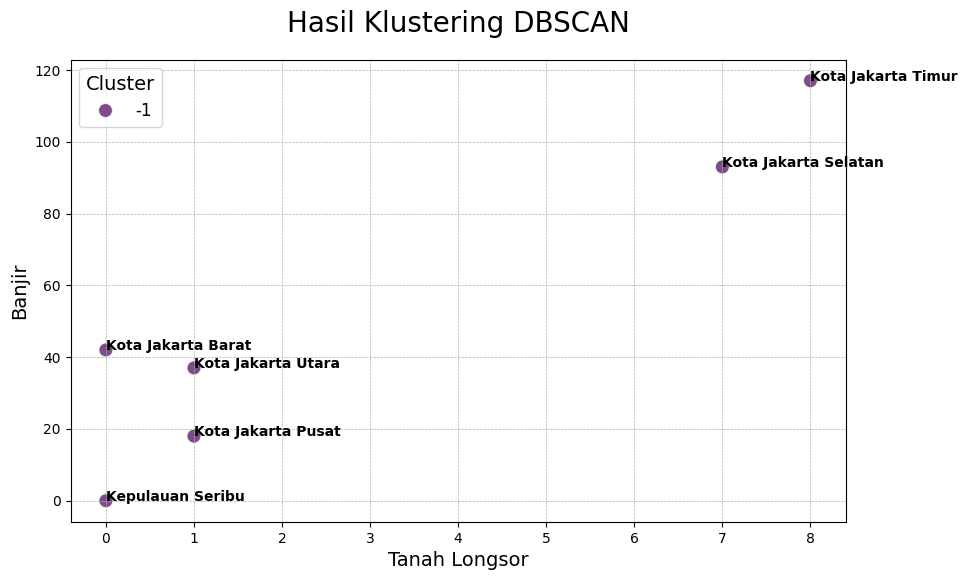

In [15]:
# Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat file CSV (diasumsikan bernama 'DATA KLUSTER DBSCAN.csv')
nama_file = 'DATA KLUSTER DBSCAN.csv'
data = pd.read_csv(nama_file, delimiter=',')

# Menghapus kolom non-numerik untuk pengelompokan
data_numerik = data.drop(columns=['Nama Kota/Kep', 'Kode Kota/Kep'])

# Normalisasi data
scaler = StandardScaler()
data_ternormalisasi = scaler.fit_transform(data_numerik)

# Terapkan pengelompokan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameter eps dan min_samples bisa disesuaikan
cluster = dbscan.fit_predict(data_ternormalisasi)

# Tambahkan informasi kelompok kembali ke data asli
data['Cluster'] = cluster

# Plot klaster dengan visualisasi yang ditingkatkan
plt.figure(figsize=(10, 6))
palet = sns.color_palette("viridis", as_cmap=True)
scatter = sns.scatterplot(
    x=data_numerik.columns[0],
    y=data_numerik.columns[1],
    hue='Cluster',
    palette=palet,
    data=data,
    legend='full',
    s=100,
    edgecolor='w',
    alpha=0.7
)

# Tingkatkan plot dengan fitur tambahan
plt.title('Hasil Klustering DBSCAN', fontsize=20, loc='center', pad=20)
plt.xlabel(data_numerik.columns[0], fontsize=14)
plt.ylabel(data_numerik.columns[1], fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)

# Anotasi setiap titik dengan nama kota/kepulauan
for line in range(0, data.shape[0]):
    scatter.text(
        data[data_numerik.columns[0]].iloc[line],
        data[data_numerik.columns[1]].iloc[line],
        data['Nama Kota/Kep'].iloc[line],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.show()

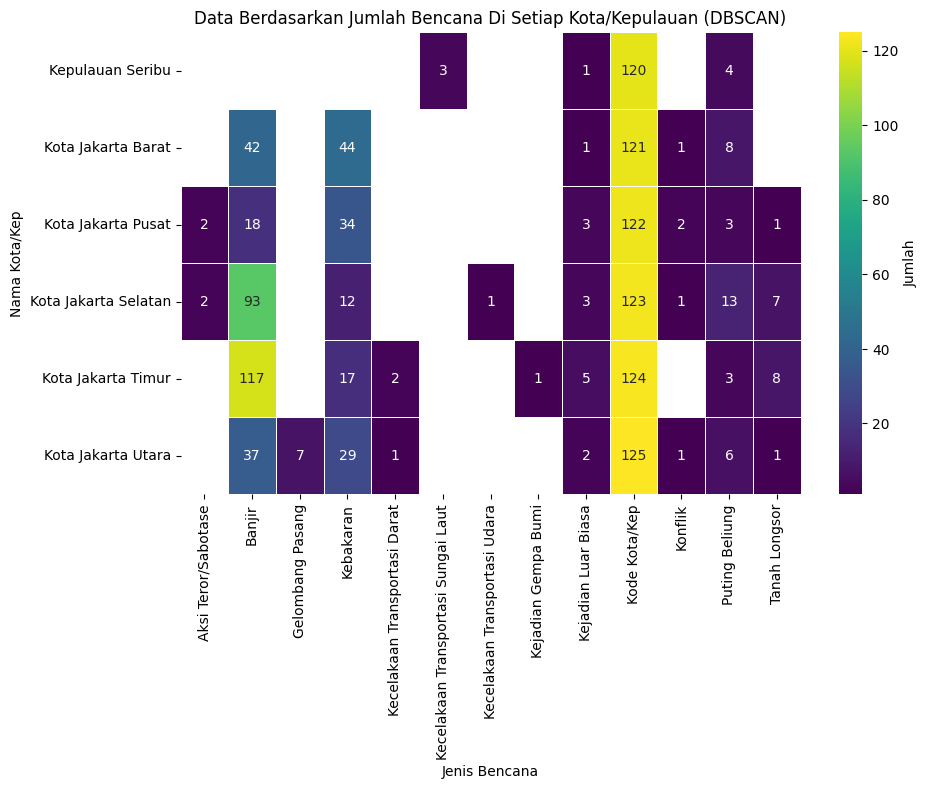

In [16]:
# Membuat DataFrame baru untuk heatmap
data_heatmap = data.melt(id_vars=['Nama Kota/Kep', 'Cluster'],  # Sesuaikan nama kolom di sini juga
                         var_name='Jenis Bencana',
                         value_name='Jumlah')

# Pivot tabel untuk heatmap
pivot_heatmap = data_heatmap.pivot_table(index='Nama Kota/Kep', columns='Jenis Bencana', values='Jumlah', aggfunc='sum', fill_value=0)

# Mengganti 0 dengan NaN
pivot_heatmap.replace(0, np.nan, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt='g', cmap='viridis', linewidths=.5, cbar_kws={'label': 'Jumlah'})

plt.title('Data Berdasarkan Jumlah Bencana Di Setiap Kota/Kepulauan (DBSCAN)')
plt.xlabel('Jenis Bencana')
plt.ylabel('Nama Kota/Kep')
plt.show()